<a href="https://colab.research.google.com/github/moon2su/AI/blob/main/AI_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/car_evaluation.csv", header = None) # 칼람명이 없는 경우 불러오는 방법
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [9]:
df.columns = ["Price", "Maint", "Doors", "Persons", "Lug_boot", "Safety", "Class"]

df

,Price,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
df.columns

Index(['Price', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class'], dtype='object')

In [11]:
df.isnull().sum()

,0
Price,0
Maint,0
Doors,0
Persons,0
Lug_boot,0
Safety,0
Class,0


In [12]:
df = df.dropna()
df.isnull().sum()

,0
Price,0
Maint,0
Doors,0
Persons,0
Lug_boot,0
Safety,0
Class,0


In [13]:
df['Class'].value_counts()

,count
Class,
unacc,1210
acc,384
good,69
vgood,65


In [16]:
label_encoder = LabelEncoder()

label_encoders = {}  # 칼럼별 인코더 저장

for col in df.select_dtypes(include=['object']).columns:  # 문자열(범주형) 칼럼만 선택
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # 문자열 → 숫자 변환
    label_encoders[col] = le  # 이후 디코딩을 위해 저장

df

,Price,Maint,Doors,Persons,Lug_boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [17]:
df['Class'].value_counts()

,count
Class,
2,1210
0,384
1,69
3,65


Text(0.5, 1.0, 'Label')

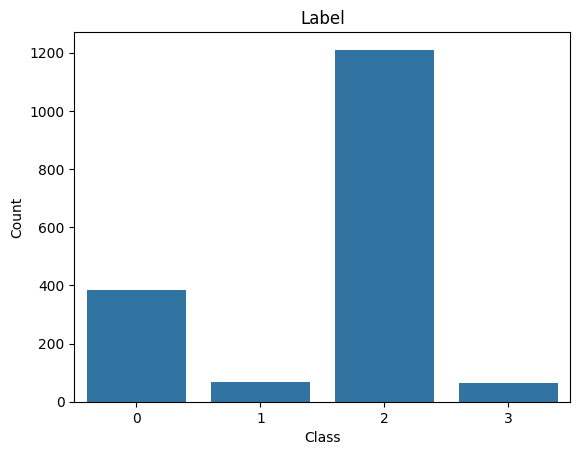

In [18]:
sns.countplot(data = df, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [19]:
# pandas dataframe에서 numpy로 변경
X = df.drop('Class', axis=1).values # feature
y = df['Class'].values # output(정답)

In [20]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [21]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [22]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X) # X의 값을 0과 1사이로 mapping 해주는 방법

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # ex)6개 짜리 칼럼이 1382개 있다. 정답 값이 1382개 있다.

((1382, 6), (346, 6), (1382,), (346,))

In [25]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9132947976878613
[[ 73   1   4   1]
 [  7   8   0   2]
 [ 12   0 228   0]
 [  3   0   0   7]]


In [26]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6502890173410405
[[  9   0  67   3]
 [  1   0  16   0]
 [ 22   0 214   4]
 [  2   0   6   2]]


In [28]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9682080924855492
[[ 71   4   4   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]


In [31]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9653179190751445
[[ 73   4   1   1]
 [  1  13   0   3]
 [  1   0 239   0]
 [  1   0   0   9]]
